In [1]:
import warnings
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from brain_decoding.config.file_path import RESULT_PATH
from brain_decoding.utils.analysis import (
    prediction_curve, correlation_heatmap, smooth_columns, combine_continuous_scores, stage_box_plot, read_sleep_score,
    correlation_heatmap_by_stage, multi_facet_correlation_heatmap, load_prediction, PREDICTION_FS, CONCEPT_LABELS as labels
)
from brain_decoding.utils.burst_analysis import ActivationBurstAnalysis, dot_plot
# Suppress all UserWarning messages
warnings.filterwarnings('ignore', category=UserWarning)

activation_path = os.path.join(
    RESULT_PATH, 
    '8concepts/562_None_multi-vit_test_optimalX_CARX_2024-10-23_16-09-32/memory/prediction/epoch40_test_sleep_3_results.npy'
)

sleep_score_file = '/Users/XinNiuAdmin/Documents/brain_decoding/data/562/EXP6_Movie24&562_firstpass.csv'

file_path = os.path.dirname(activation_path)

predictions = load_prediction(activation_path)
sleep_score = read_sleep_score(sleep_score_file)
sleep_score.head(5)

shape of predictions: (127791, 8), duration: 8.874375 hours
shape of sleep_score: (1065, 1), duration: 8.875 hours
shape of sleep_score after merge: (55, 2)


,Score,start_index
0,Wake/REM,0
1,SWS,18000
2,Wake/REM,18120
3,SWS,18840
4,Wake/REM,33840


In [2]:
burst_analysis = ActivationBurstAnalysis(predictions, labels, PREDICTION_FS)
burst_analysis.threshold = .9
burst_analysis.min_burst_duration = 1
burst_analysis.window_size = 60 # in seconds

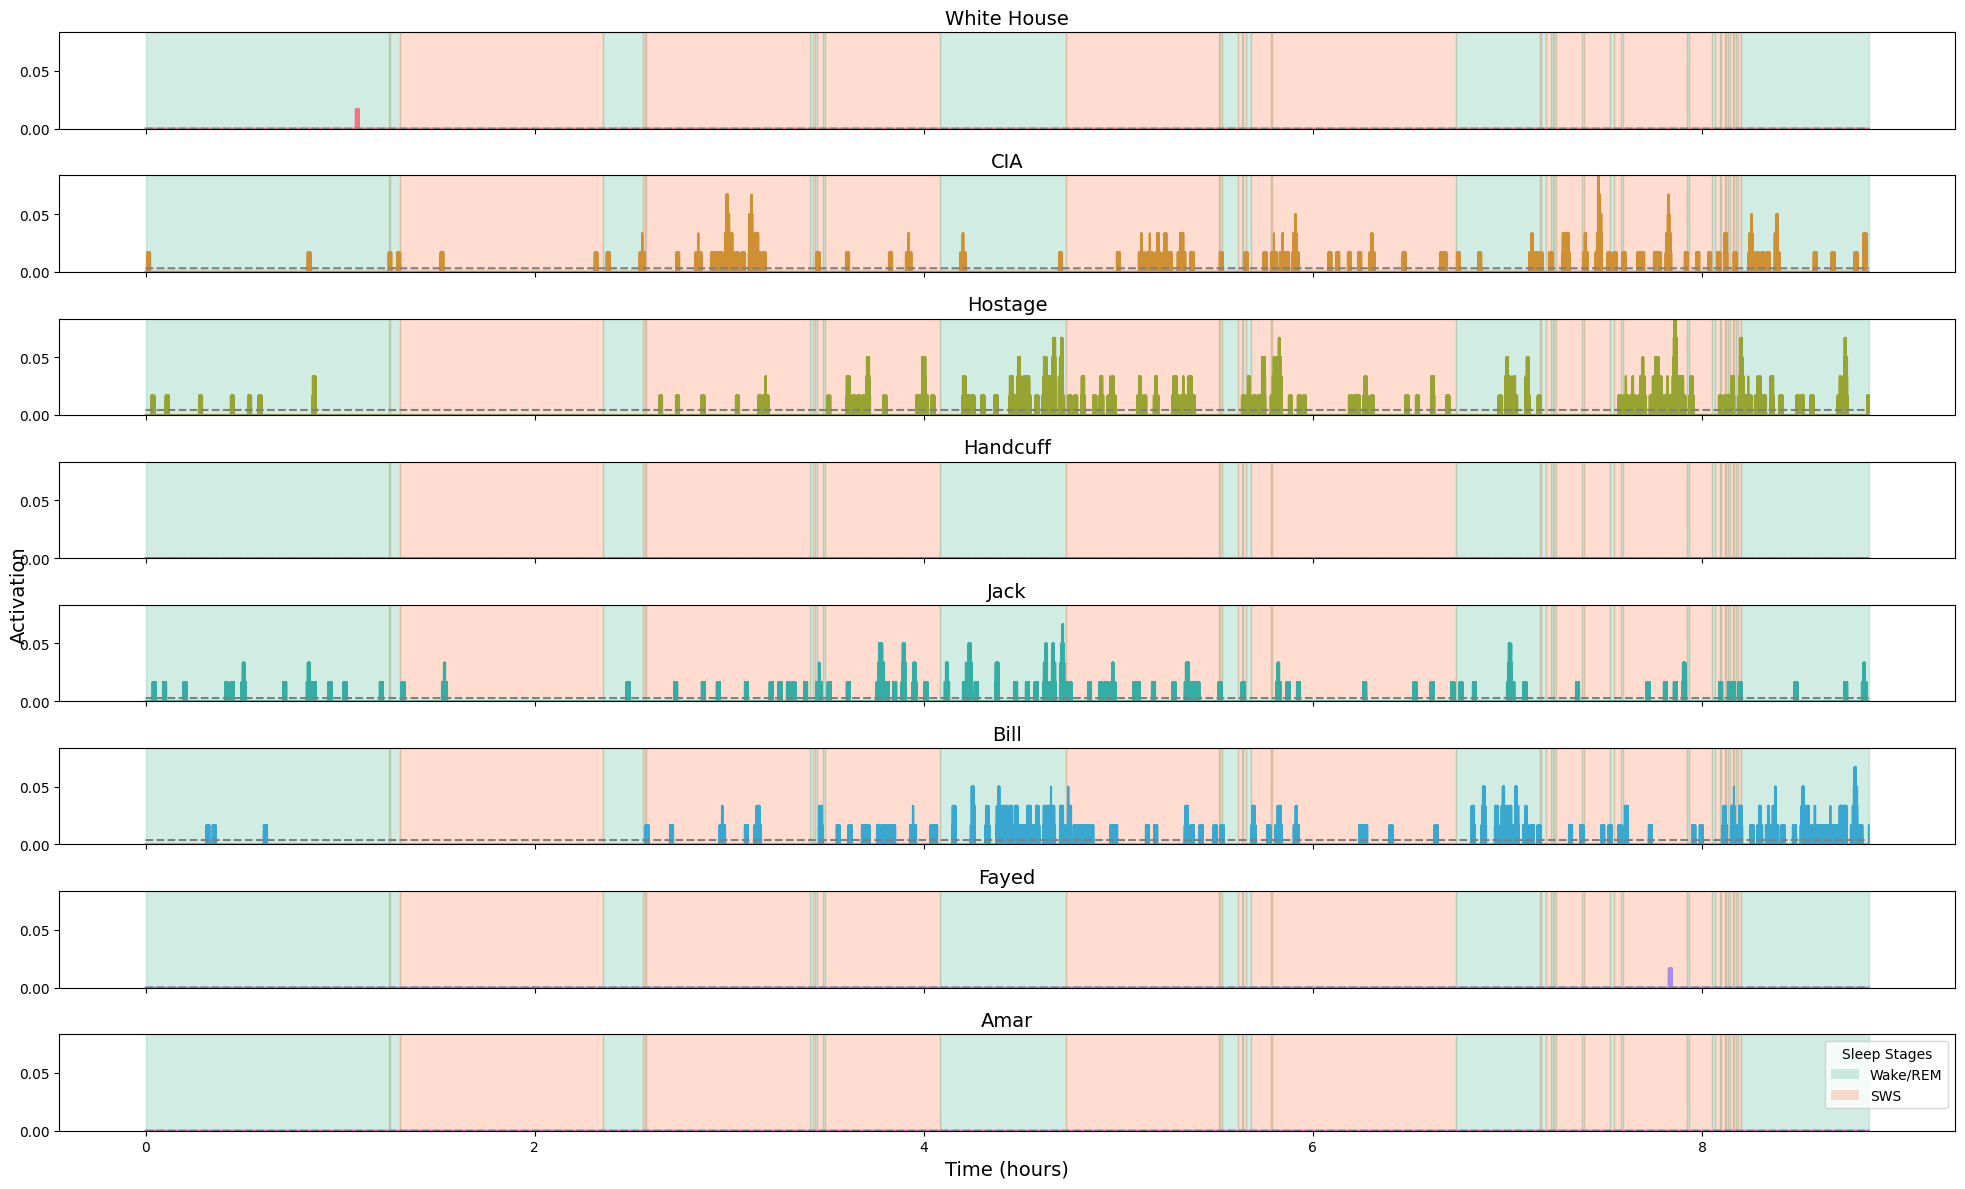

In [3]:
fig_name = os.path.join(file_path, 'epoch40_burst_rate.png')
burst_rate = burst_analysis.sliding_window_analysis(burst_analysis.calculate_burst_rate)
prediction_curve(burst_rate, sleep_score, labels, fig_name)

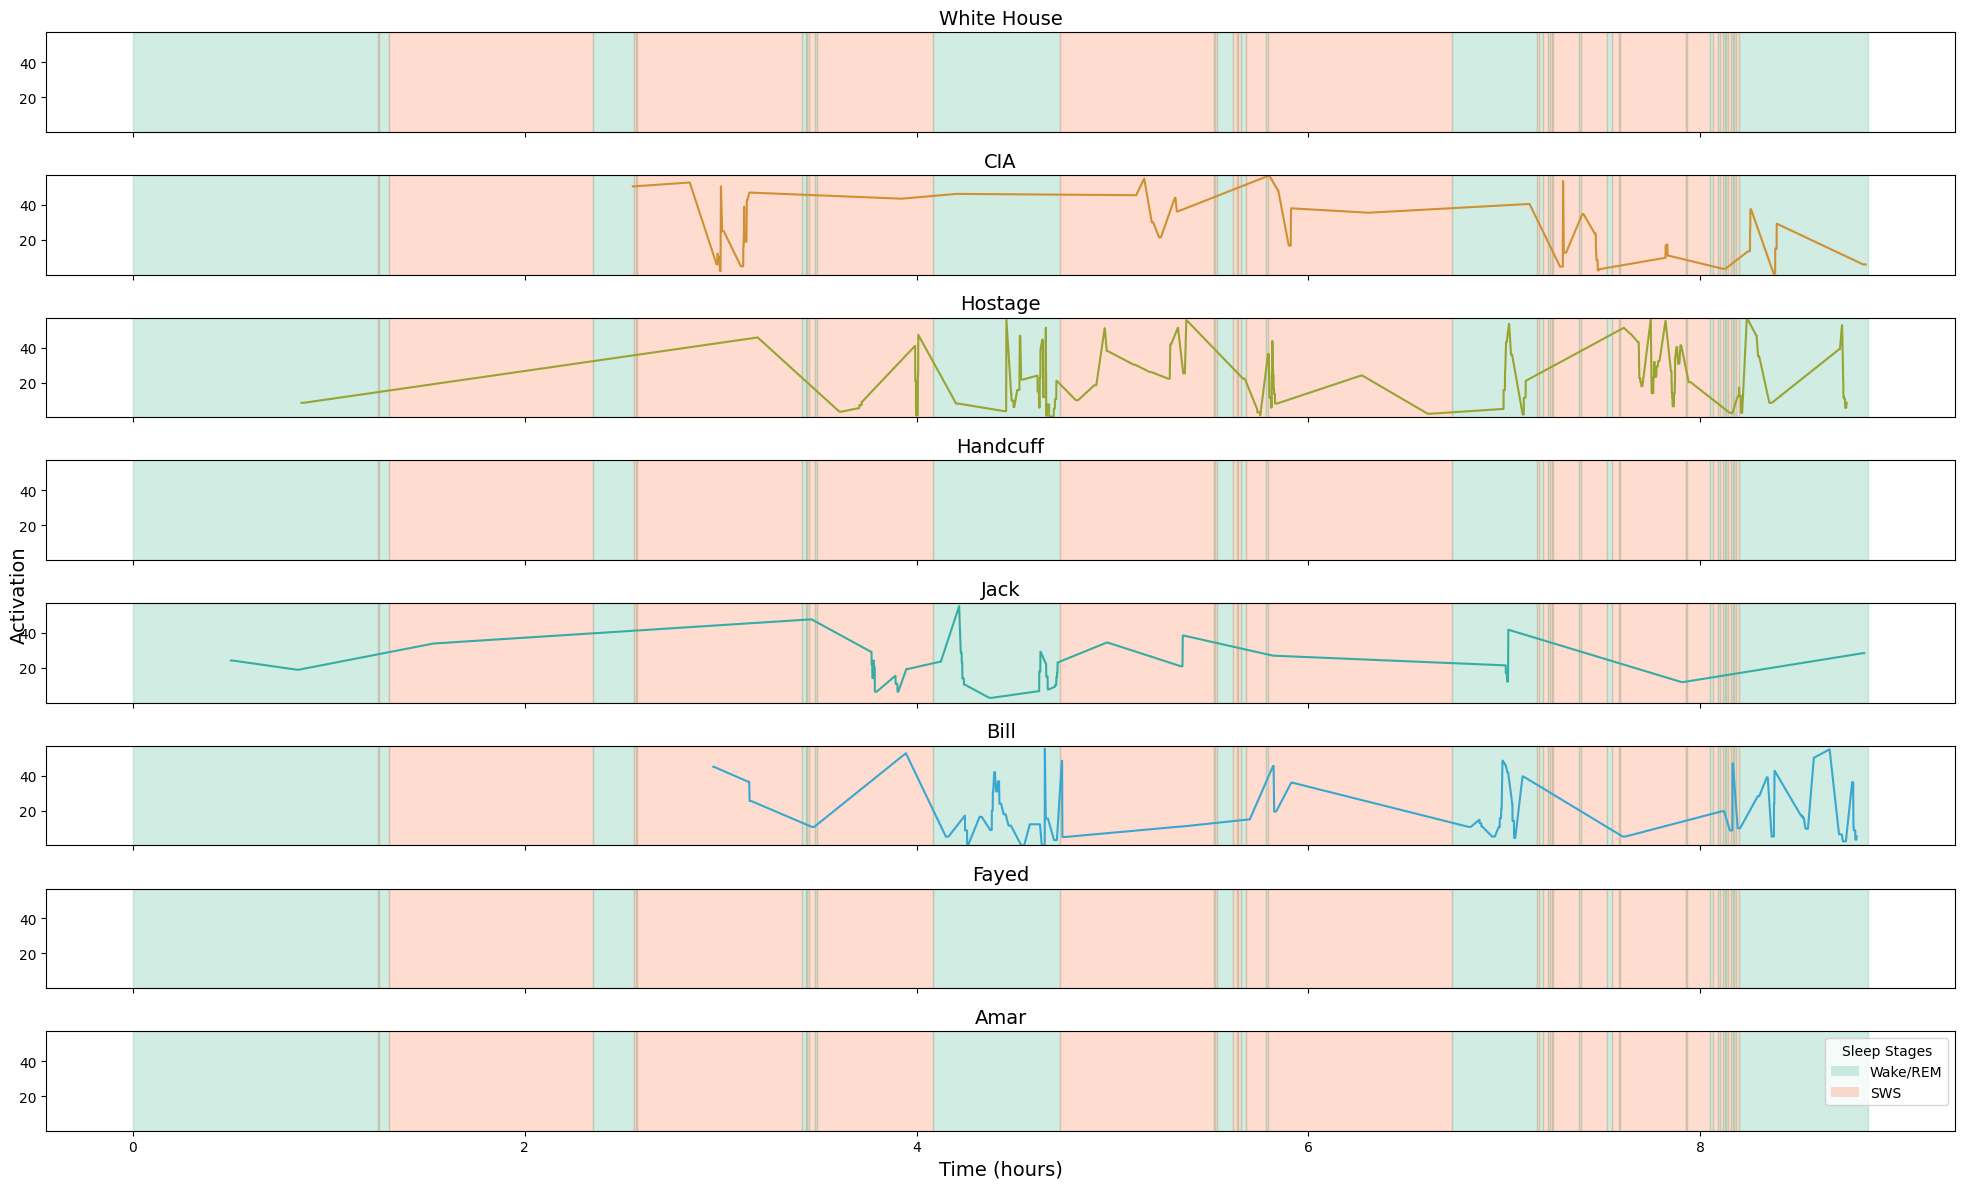

In [4]:
fig_name = os.path.join(file_path, 'epoch40_burst_ibi.png')
burst_ibi = burst_analysis.sliding_window_analysis(burst_analysis.calculate_ibi)
prediction_curve(burst_ibi, sleep_score, labels, fig_name)

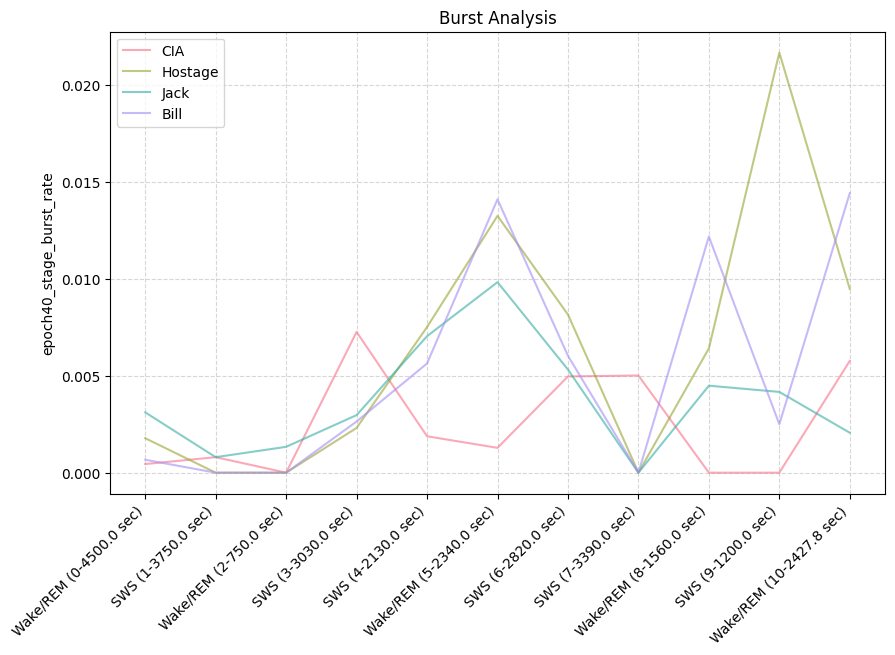

In [5]:
fig_name = os.path.join(file_path, 'epoch40_stage_burst_rate.png')
col_idx = [1,2,4,5]
stage_burst_rate, sleep_stages = burst_analysis.stage_analysis(sleep_score, burst_analysis.calculate_burst_rate)
dot_plot(stage_burst_rate[:,col_idx], sleep_stages, [labels[x] for x in col_idx], fig_name)